In [40]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf

In [62]:
import yfinance as yf

tickerStr = "AAPL"
ticker = yf.Ticker(tickerStr)
df = ticker.history(period='5y')['Close'].values
df = df.reshape(-1, 1)

In [63]:
df.shape

(1259, 1)

In [64]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
#dataset_test = np.array(df[int(df.shape[0]*0.8):])
print(dataset_train.shape)
print(dataset_test.shape)

(1007, 1)
(302, 1)


In [65]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:7]

array([[0.13068925],
       [0.12862806],
       [0.11076356],
       [0.12048862],
       [0.11789879],
       [0.13692599],
       [0.14480113]])

In [66]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:7]

array([[0.67695607],
       [0.69663638],
       [0.71969996],
       [0.71958719],
       [0.72471866],
       [0.73898535],
       [0.77783827]])

In [67]:
def create_my_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [68]:
x_train, y_train = create_my_dataset(dataset_train)
x_train[:1]

array([[0.13068925, 0.12862806, 0.11076356, 0.12048862, 0.11789879,
        0.13692599, 0.14480113, 0.14754958, 0.13935719, 0.14532967,
        0.1408371 , 0.1396744 , 0.14226409, 0.13719024, 0.13158775,
        0.12587969, 0.14612242, 0.14215856, 0.14189422, 0.12809943,
        0.13100638, 0.1152033 , 0.11150361, 0.10098567, 0.10547825,
        0.09300495, 0.07741325, 0.0842841 , 0.08375561, 0.09104933,
        0.0879838 , 0.08158857, 0.09173637, 0.08423118, 0.07334347,
        0.07381918, 0.05986593, 0.04924242, 0.02677965, 0.02947536,
        0.03777324, 0.04533122, 0.03174788, 0.0430056 , 0.03037363,
        0.02788969, 0.02857677, 0.02598695, 0.05304782, 0.0425829 ]])

In [50]:
y_train[:1]

array([0.0280483])

In [69]:
x_test, y_test = create_my_dataset(dataset_test)
x_test[:1]

array([[0.67695607, 0.69663638, 0.71969996, 0.71958719, 0.72471866,
        0.73898535, 0.77783827, 0.77501878, 0.7505454 , 0.75703024,
        0.76154159, 0.77321432, 0.76300781, 0.74479355, 0.75037629,
        0.74451166, 0.76340238, 0.75697398, 0.75094015, 0.77998113,
        0.78347727, 0.75172956, 0.76221814, 0.79712375, 0.79740572,
        0.78240588, 0.79723652, 0.81449191, 0.84900277, 0.84708546,
        0.84398407, 0.83862697, 0.84375844, 0.85013059, 0.87325051,
        0.87014913, 0.88830661, 0.89056224, 0.9074794 , 0.92140768,
        0.88892699, 0.88875779, 0.91977234, 0.95958397, 0.96905724,
        0.96697107, 0.96759128, 0.98433291, 0.98834868, 1.        ]])

In [61]:
y_test[:1]

array([1.00953714])

In [70]:
#reshaping for LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
print(x_train.shape)
print(x_test.shape)


(957, 50, 1)
(252, 50, 1)


In [71]:
tf.logging.set_verbosity(tf.logging.ERROR)
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1],1)))
#model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(units=96))
#model.add(Dropout(0.2))
model.add(Dense(units=1))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 96)            37632     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
lstm_3 (LSTM)                (None, 96)                74112     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 97        
Total params: 185,953
Trainable params: 185,953
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [73]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save(os.path.join("..","static","models",f"{tickerStr}.h5"))

Epoch 1/50
957/957 [==============================] - 3s 3ms/step - loss: 0.0241
Epoch 2/50
957/957 [==============================] - 2s 2ms/step - loss: 0.0020
Epoch 3/50
957/957 [==============================] - 2s 2ms/step - loss: 0.0016
Epoch 4/50
957/957 [==============================] - 2s 2ms/step - loss: 0.0016
Epoch 5/50
957/957 [==============================] - 2s 2ms/step - loss: 0.0015
Epoch 6/50
957/957 [==============================] - 2s 2ms/step - loss: 0.0012
Epoch 7/50
957/957 [==============================] - 2s 2ms/step - loss: 0.0010
Epoch 8/50
957/957 [==============================] - 2s 2ms/step - loss: 9.8334e-04
Epoch 9/50
957/957 [==============================] - 2s 2ms/step - loss: 9.6644e-04
Epoch 10/50
957/957 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 11/50
957/957 [==============================] - 2s 2ms/step - loss: 9.8140e-04
Epoch 12/50
957/957 [==============================] - 2s 2ms/step - loss: 0.0010
Epoch 13/50
9

AttributeError: module 'os' has no attribute 'join'

In [55]:
if(not os.path.exists('C:\code\ML\mfst.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save(os.join("..","static","models",f"{tickerStr}.h5"))
else:
    model = load_model('stock_prediction.h5')

range(1007, 1259)


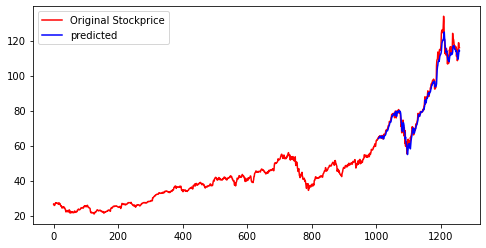

In [75]:
#visualizing our predictions
%matplotlib inline
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red', label='Original Stockprice')
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions,color='blue',label='predicted')
plt.legend()
print(range(len(y_train)+50,len(y_train)+50+len(predictions)))

In [30]:
msft.history('1mo')['Open'].values.reshape(-1,1)

array([[218.78999329],
       [222.72000122],
       [223.        ],
       [217.1000061 ],
       [220.1499939 ],
       [220.41999817],
       [215.80000305],
       [213.11999512],
       [213.92999268],
       [215.02999878],
       [213.8500061 ],
       [211.58999634],
       [207.66999817],
       [204.07000732],
       [203.5       ],
       [204.28999329],
       [203.88999939],
       [214.02000427],
       [222.03999329],
       [222.25999451],
       [224.44000244],
       [214.5       ]])

In [60]:
predictions_prepended = [0 for i in range(0,df.shape[0]-len(predictions))]
predictions_prepended.extend(predictions.flatten().tolist())
graph1 = pd.DataFrame({
    "opening_price": df.flatten().tolist(),
    "predicted_prices": predictions_prepended,
})
graph1.to_csv('graph_1.csv',index_label="Index")

,opening_price,predicted_prices
0,48.756870,0.000000
1,48.456959,0.000000
2,48.020748,0.000000
3,48.865921,0.000000
4,48.463364,0.000000
...,...,...
1254,216.389999,190.310562
1255,223.289993,190.184937
1256,223.720001,192.432175
1257,218.389999,196.576477


In [117]:
graph1.to_csv('graph_1.csv',index_label="Index")

In [1]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Price of testing set')
plt.plot(predictions,color='blue',label='predicted')
plt.legend()
plt.savefig('image.png')

NameError: name 'scaler' is not defined